# Autofig Mesh

In [1]:
import autofig
import numpy as np
import phoebe # PHOEBE 2.1 used for this demonstration

In [2]:
#autofig.inline()

Let's generate a mesh in PHOEBE

In [3]:
b = phoebe.default_binary()
b.add_dataset('mesh', times=[0], columns=['teffs', 'vws'])
b.run_compute()

<ParameterSet: 10 parameters | components: primary, secondary>

In [4]:
verts = b.get_value(qualifier='uvw_elements', component='primary', context='model')
print(verts.shape) # [polygon, vertex, dimension]

(1738, 3, 3)


In [5]:
teffs = b.get_value(qualifier='teffs', component='primary', context='model')
print(teffs.shape) # [polygon]

(1738,)


In [6]:
vzs = b.get_value(qualifier='vws', component='primary', context='model')
print(vzs.shape) # [polygon]

(1738,)


In [7]:
xs = verts[:, :, 0]
ys = verts[:, :, 1]
zs = verts[:, :, 2]
print(xs.shape, ys.shape, zs.shape)  # [polygon, vertex]

((1738, 3), (1738, 3), (1738, 3))


Meshes can be drawn by calling the `mesh` (instead of `plot`) method of a figure.  Most syntax and features are identical between the two, with the following exceptions:
* NO 'c' or 's' dimensions
* ADDITION of 'fc' (facecolor) and 'ec' (edgecolor) dimensions
* linestyle applies to the edges
* NO highlight
* uncover DEFAULTS to True
* trail DEFAULTS to 0
* NO marker
* NO linebreak

If 'z' is passed, the polygons will automatically be sorted in the order of positive z.  It is therefore suggested to pass 'z' for any 3D meshes even if plotting in 2D.

The edgecolor will default to 'black' and the facecolor to 'none' if not provided:

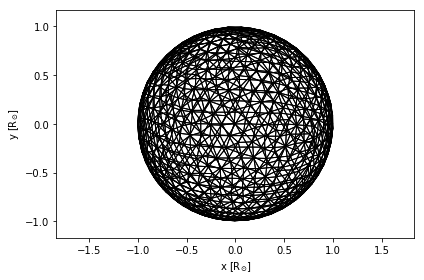

In [8]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs, 
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad')
mplfig = autofig.draw()

As was the case for dimensions in `plot`, 'fc' (facecolor) and 'ec' (edgecolor) accept the following suffixes:
* label
* unit
* map
* lim

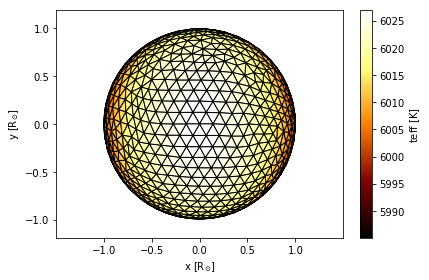

In [9]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs, 
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad',
             fc=teffs, fcmap='afmhot', fclabel='teff', fcunit='K')
mplfig = autofig.draw()

The edges can be turned off by passing ec='none'.  Also see how fclim='symmetric' will force the white in the 'bwr' colormap to correspond to vz=0.

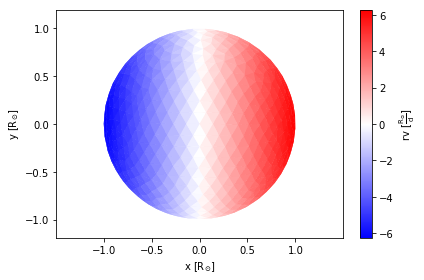

In [10]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs,
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad',
             fc=-vzs, fcmap='bwr', fclim='symmetric', fclabel='rv', fcunit='solRad/d', 
             ec='none')
mplfig = autofig.draw()

The facecolor default to 'none' allows you to see "through" the mesh:

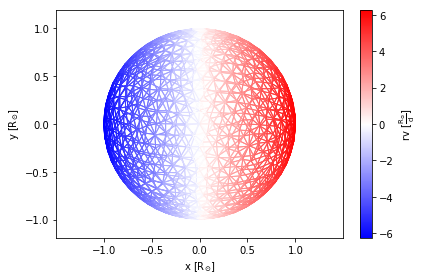

In [11]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs,
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad',
             ec=-vzs, ecmap='bwr', eclim='symmetric', eclabel='rv', ecunit='solRad/d')
mplfig = autofig.draw()

In order to not see through the mesh, set the facecolor to 'white':

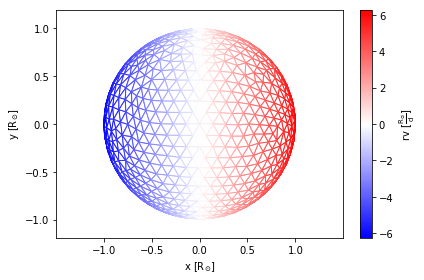

In [12]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs,
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad',
             ec=-vzs, ecmap='bwr', eclim='symmetric', eclabel='rv', ecunit='solRad/d', 
             fc='white')
mplfig = autofig.draw()

We can of course provide different arrays and colormaps for the edge and face:

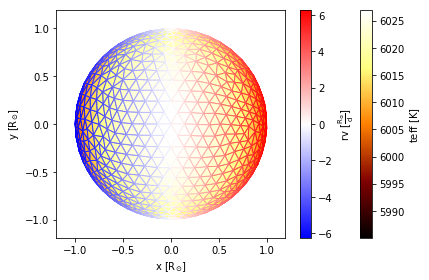

In [13]:
autofig.reset()
autofig.mesh(x=xs, y=ys, z=zs, 
             xlabel='x', xunit='solRad', 
             ylabel='y', yunit='solRad',
             fc=teffs, fcmap='afmhot', fclabel='teff', fcunit='K',
             ec=-vzs, ecmap='bwr', eclim='symmetric', eclabel='rv', ecunit='solRad/d')
mplfig = autofig.draw()

## Animate and Limits

In [2]:
times = np.linspace(0,1,21)
b = phoebe.default_binary()
b.add_dataset('mesh', times=times, columns='vws')
b.run_compute()

<ParameterSet: 128 parameters | components: primary, secondary>

Rather than add an extra dimension, we can make a separate call to `mesh` for each time and pass the time to the 'i' dimension as a float.

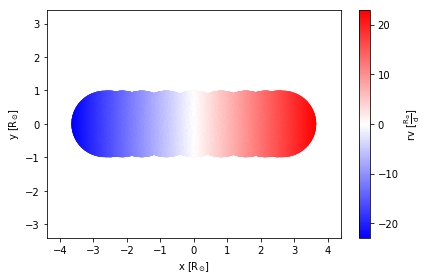

In [3]:
autofig.reset()
for t in times:
    for c in ['primary', 'secondary']:
        verts = b.get_value(time=t, component=c, qualifier='uvw_elements', context='model')
        vzs = b.get_value(time=t, component=c, qualifier='vws', context='model')
        xs = verts[:, :, 0]
        ys = verts[:, :, 1]
        zs = verts[:, :, 2]
        autofig.mesh(x=xs, y=ys, z=zs, i=t,
                     xlabel='x', xunit='solRad', 
                     ylabel='y', yunit='solRad',
                     fc=-vzs, fcmap='bwr', fclim='symmetric', fclabel='rv', fcunit='solRad/d', 
                     ec='none',
                     consider_for_limits=c=='primary')
    
mplfig = autofig.draw()

In [4]:
autofig.gcf().axes[0].pad_aspect=False  # pad_aspect=True (default) causes issues with fixed limits... sigh
anim = autofig.animate(i=times, save='mesh_1.gif', save_kwargs={'writer': 'imagemagick'})

![animation](mesh_3.gif)

In [4]:
autofig.gcf().axes[0].x.lim = None
anim = autofig.animate(i=times, save='mesh_2.gif', save_kwargs={'writer': 'imagemagick'})

![animation](mesh_2.gif)

In [6]:
autofig.gcf().axes[0].x.lim = 4
anim = autofig.animate(i=times, save='mesh_3.gif', save_kwargs={'writer': 'imagemagick'})

![animation](mesh_3.gif)